In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [3]:
path = "results/linear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_0.csv', 'results/linear_multi\\linear_dgp_1.csv', 'results/linear_multi\\linear_dgp_12.csv', 'results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_16.csv', 'results/linear_multi\\linear_dgp_17.csv', 'results/linear_multi\\linear_dgp_18.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_21.csv', 'results/linear_multi\\linear_dgp_23.csv', 'results/linear_multi\\linear_dgp_24.csv', 'results/linear_multi\\linear_dgp_26.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_28.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/linear_multi\\linear_dgp_30.csv', 'results/linear_multi\\linear_dgp_7.csv', 'results/linear_multi\\linear_dgp_8.csv']


In [9]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[0, 1, 3, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 26, 27, 28, 30]

In [10]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   TRUE   bias    std   RMSE   q025   q975  covering  \
0      0.0  1.619   1.620  1.613  0.006  0.036  0.036  1.548  1.689       1.0   
1      0.0  1.619   1.619  1.613  0.006  0.036  0.036  1.548  1.690       1.0   
2      0.0  1.646   1.646  1.665 -0.019  0.038  0.043  1.571  1.720       1.0   
3      0.0  1.636   1.635  1.665 -0.029  0.039  0.049  1.559  1.714       1.0   
4      0.0  1.824   1.824  1.613  0.211  0.054  0.218  1.718  1.931       0.0   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...       ...   
195  305.0  1.480   1.480    NaN -0.030  0.052  0.060  1.379  1.584       1.0   
196  305.0  1.810   1.810    NaN  0.034  0.044  0.056  1.725  1.896       1.0   
197  305.0  1.814   1.814    NaN  0.038  0.046  0.060  1.723  1.903       1.0   
198  305.0  1.558   1.559    NaN  0.048  0.044  0.065  1.473  1.645       1.0   
199  305.0  1.544   1.544    NaN  0.034  0.046  0.057  1.453  1.636       1.0   

              method estima

In [11]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [12]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [15]:
def coverage_perc(x):
    return np.mean(x)*100

df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean','median'],
                                         'bias' : ['mean','median'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


estimand   model    type      mean    median       std              bias  \
                                 mean      mean      mean  median      mean   
0   dynamic      GP      1S  1.779000  1.778233  0.045876  0.0450  0.023525   
1   dynamic      GP      2S  1.760767  1.766490  0.061406  0.0520  0.005292   
2   dynamic      GP      3S  1.764272  1.767347  0.062787  0.0540  0.008797   
3   dynamic      GP    Obs.  2.051411  2.054906  0.082738  0.0630  0.295936   
4   dynamic      GP  Oracle  1.755579  1.760713  0.047050  0.0380  0.000104   
5   dynamic  Linear      1S  1.779995  1.779911  0.043856  0.0440  0.024520   
6   dynamic  Linear      2S  1.758777  1.758604  0.052535  0.0530  0.003302   
7   dynamic  Linear      3S  1.759871  1.759545  0.055500  0.0560  0.004396   
8   dynamic  Linear    Obs.  2.066574  2.066569  0.060802  0.0595  0.311099   
9   dynamic  Linear  Oracle  1.764396  1.764421  0.037772  0.0380  0.008921   
10    stoch      GP      1S  1.564975  1.564282  0.051559  0.0485  0.013000   
11    stoch      GP      2S  1.471574  1.477079  0.061302  0.0510 -0.080401   
12    stoch      GP      3S  1.473624  1.476267  0.061307  0.0520 -0.078351   
13    stoch      GP    Obs.  1.577257  1.579644  0.070901  0.0550  0.025282   
14    stoch      GP  Oracle  1.544658  1.549822  0.048871  0.0380 -0.007317   
15    stoch  Linear      1S  1.572243  1.572243  0.045480  0.0450  0.020267   
16    stoch  Linear      2S  1.495837  1.495683  0.051198  0.0510 -0.056139   
17    stoch  Linear      3S  1.495832  1.495490  0.052866  0.0520 -0.056144   
18    stoch  Linear    Obs.  1.584871  1.584842  0.052401  0.0520  0.032896   
19    stoch  Linear  Oracle  1.555456  1.555485  0.037985  0.0380  0.003480   

              true      RMSE      q025      q975 ci_length      covering  
    median    mean      mean      mean      mean      mean coverage_perc  
0   0.0400  1.7546  0.072530  1.690782  1.868456  0.177673     80.198020  
1   0.0330  1.7546  0.089960  1.645723  1.868777  0.223054     90.099010  
2   0.0330  1.7546  0.089990  1.638386  1.874733  0.236347     90.099010  
3   0.3040  1.7546  0.324396  1.897540  2.196287  0.298748     10.891089  
4   0.0030  1.7546  0.054441  1.665055  1.835673  0.170619    100.000000  
5   0.0405  1.7546  0.071639  1.694079  1.865936  0.171856     87.128713  
6   0.0250  1.7546  0.076401  1.656302  1.862109  0.205807     90.099010  
7   0.0260  1.7546  0.078916  1.652109  1.869733  0.217624     90.099010  
8   0.3210  1.7546  0.317911  1.947490  2.185772  0.238282      0.000000  
9   0.0060  1.7546  0.043985  1.690272  1.838431  0.148158    100.000000  
10  0.0290  1.5519  0.079267  1.465728  1.665866  0.200139     80.198020  
11 -0.0530  1.5519  0.107941  1.356470  1.580673  0.224203     70.297030  
12 -0.0535  1.5519  0.106772  1.352451  1.582990  0.230540     70.792079  
13  0.0515  1.5519  0.109569  1.448441  1.700876  0.252436     80.693069  
14 -0.0040  1.5519  0.062886  1.450827  1.628257  0.177431    100.000000  
15  0.0300  1.5519  0.071921  1.483272  1.661391  0.178119     90.099010  
16 -0.0380  1.5519  0.084688  1.396000  1.596530  0.200530     80.198020  
17 -0.0385  1.5519  0.086069  1.393168  1.600361  0.207193     80.198020  
18  0.0530  1.5519  0.088381  1.482149  1.687480  0.205332     80.198020  
19 -0.0045  1.5519  0.046985  1.481050  1.629832  0.148782    100.000000

Text(0, 0.5, '')

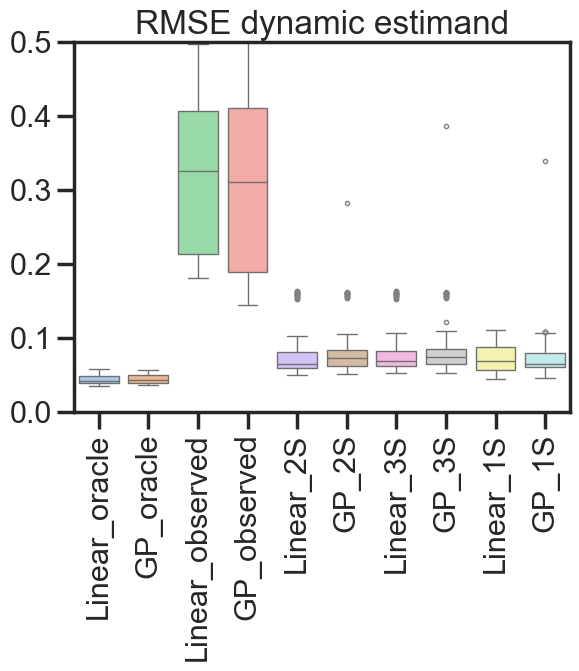

In [16]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

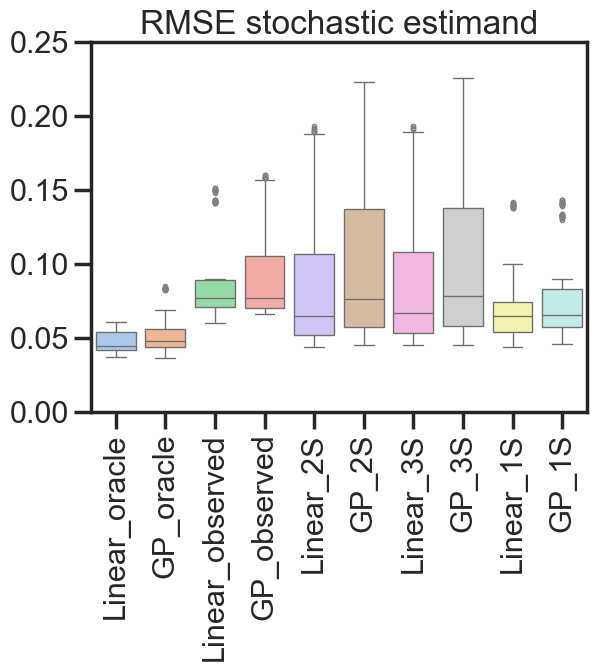

In [17]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

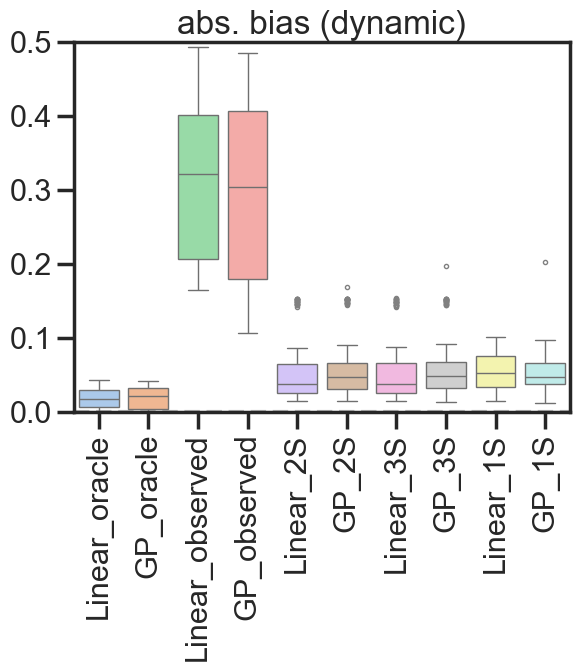

In [18]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

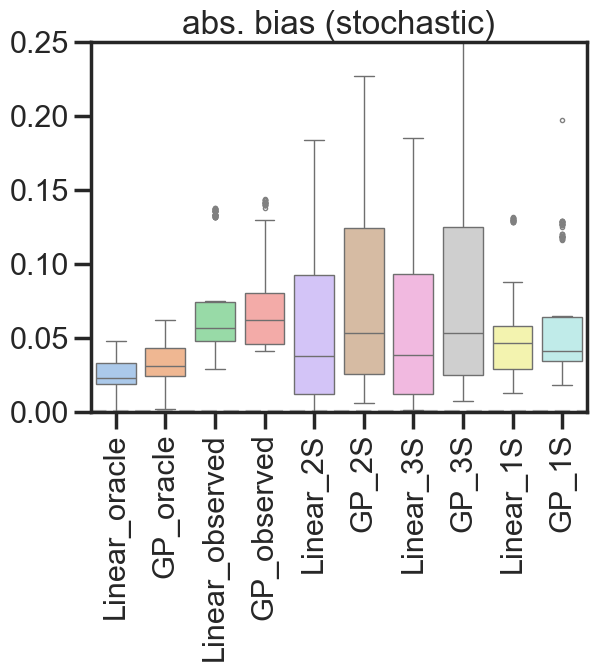

In [19]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

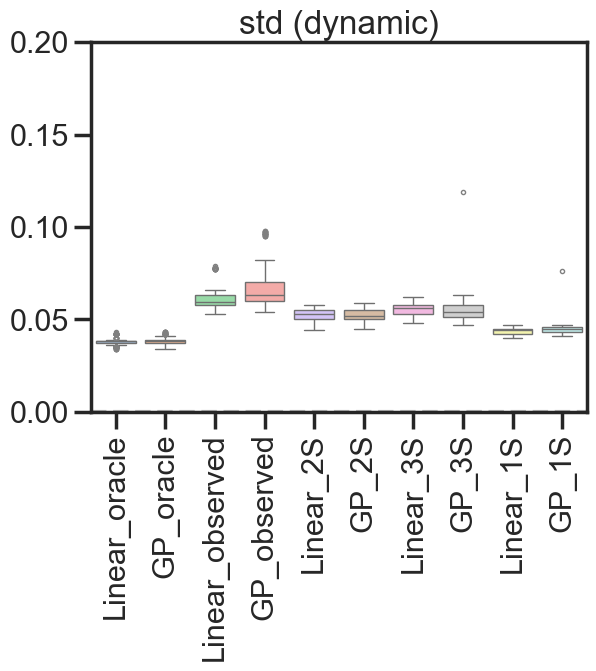

In [20]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

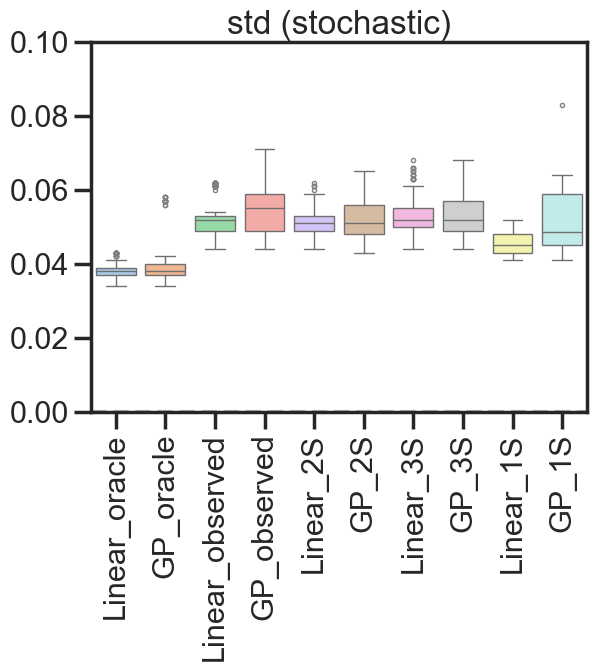

In [21]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [ ]:
# c95_text = ['{:.2f}%'.format(num) for num in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
# c95_text = [f"{p:.1f}%" for p in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
method_names = combined_df["method"].unique()
c95_max = combined_df.groupby('method').agg({'CI_length95': ['max']}).reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])[('CI_length95', 'max')]
c95_max = [val for val in c95_max]
print(c95_max)

In [ ]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_ci95 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops)
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 


In [ ]:
box_ci99 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length99',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])
box_ci99.set_title("Length of 99% CI distribution")

In [ ]:
fig, axes = plt.subplots(1, 2)

flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_rmse = sns.boxplot(data=combined_df, x = 'type', y = 'RMSE',
               order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                       hue = "type", palette = 'pastel',
                       flierprops=flierprops,
                       ax=axes[0])
box_rmse.set_title("RMSE")
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

box_ci95 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops,
                       ax=axes[1])
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 
fig = plt.gcf()
fig.set_size_inches(16.5, 6)
fig.savefig('Sim_RMSE_CI_plot.png', dpi=300)
 